In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import math
import os
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  

import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'iframe' # or 'colab' or 'iframe' or 'iframe_connected' or 'sphinx_gallery'
from math import log2, radians, cos, sqrt

pd.options.display.max_rows = 4000

from matplotlib.colors import ListedColormap


In [2]:
taem_phase_color_map_val = [0, 1, 2, 3]
taem_phase_color_map = ListedColormap(['red', 'blue', 'green', 'orange'])

In [3]:
data_taem = pd.read_csv('taem_dump.csv')

data_taem['time'] = data_taem['dtg'].cumsum()


data_taem.head()

data_taem.dtypes

,dtg,h,hdot,x,y,surfv,surfv_h,xdot,ydot,psd,...,xhac,xmep,ysgn,ysturn,xcir,ycir,yhac,rcir,Unnamed: 83,time
0,0.22,143876.953740,-399.559205,65921.815439,658600.701044,5224.266376,5208.964543,-33.287103,-5208.858183,-90.366143,...,-31992.869664,-18476.220501,-1,0,-97914.685103,-672600.701044,-14000,679690.362300,NaN,0.22
1,0.22,143788.898696,-400.909206,65898.173244,657463.053658,5222.100669,5206.688698,-33.325194,-5206.582049,-90.366722,...,-31992.869664,-18476.220501,-1,0,-97891.042908,-671463.053658,-14000,678561.190099,NaN,0.44
2,0.22,143700.556417,-402.222223,65874.555153,656325.902954,5219.901682,5204.381890,-33.361912,-5204.274958,-90.367289,...,-31992.869664,-18476.220501,-1,0,-97867.424817,-670325.902954,-14000,677432.542038,NaN,0.66
3,0.22,143611.931228,-403.532679,65850.962278,655189.254753,5217.682692,5202.054791,-33.403600,-5201.947544,-90.367912,...,-31992.869664,-18476.220501,-1,0,-97843.831942,-669189.254753,-14000,676304.424150,NaN,0.88
4,0.22,143523.016348,-404.852266,65827.397694,654053.108697,5215.490457,5199.753393,-33.530614,-5199.645281,-90.369474,...,-31992.869664,-18476.220501,-1,0,-97820.267358,-668053.108697,-14000,675176.836648,NaN,1.10


dtg            float64
h              float64
hdot           float64
x              float64
y              float64
surfv          float64
surfv_h        float64
xdot           float64
ydot           float64
psd            float64
mach           float64
qbar           float64
cosphi         float64
costh          float64
weight         float64
gamma          float64
ovhd              bool
rwid            object
cubic_c3       float64
cubic_c4       float64
pbhc_0         float64
pbhc_1         float64
pbrc_0           int64
pbrc_1         float64
delrng           int64
dnzc             int64
dnzcl          float64
dnzll          float64
dnzul          float64
dpsac          float64
drpred         float64
dsbc_at        float64
dsbi             int64
eas_cmd        float64
emep           float64
eow            float64
en             float64
emax           float64
emin           float64
es             float64
hderr          float64
herror         float64
hdref          float64
href       

Text(0.5, 0, 'Range')

Text(0, 0.5, 'EOW')

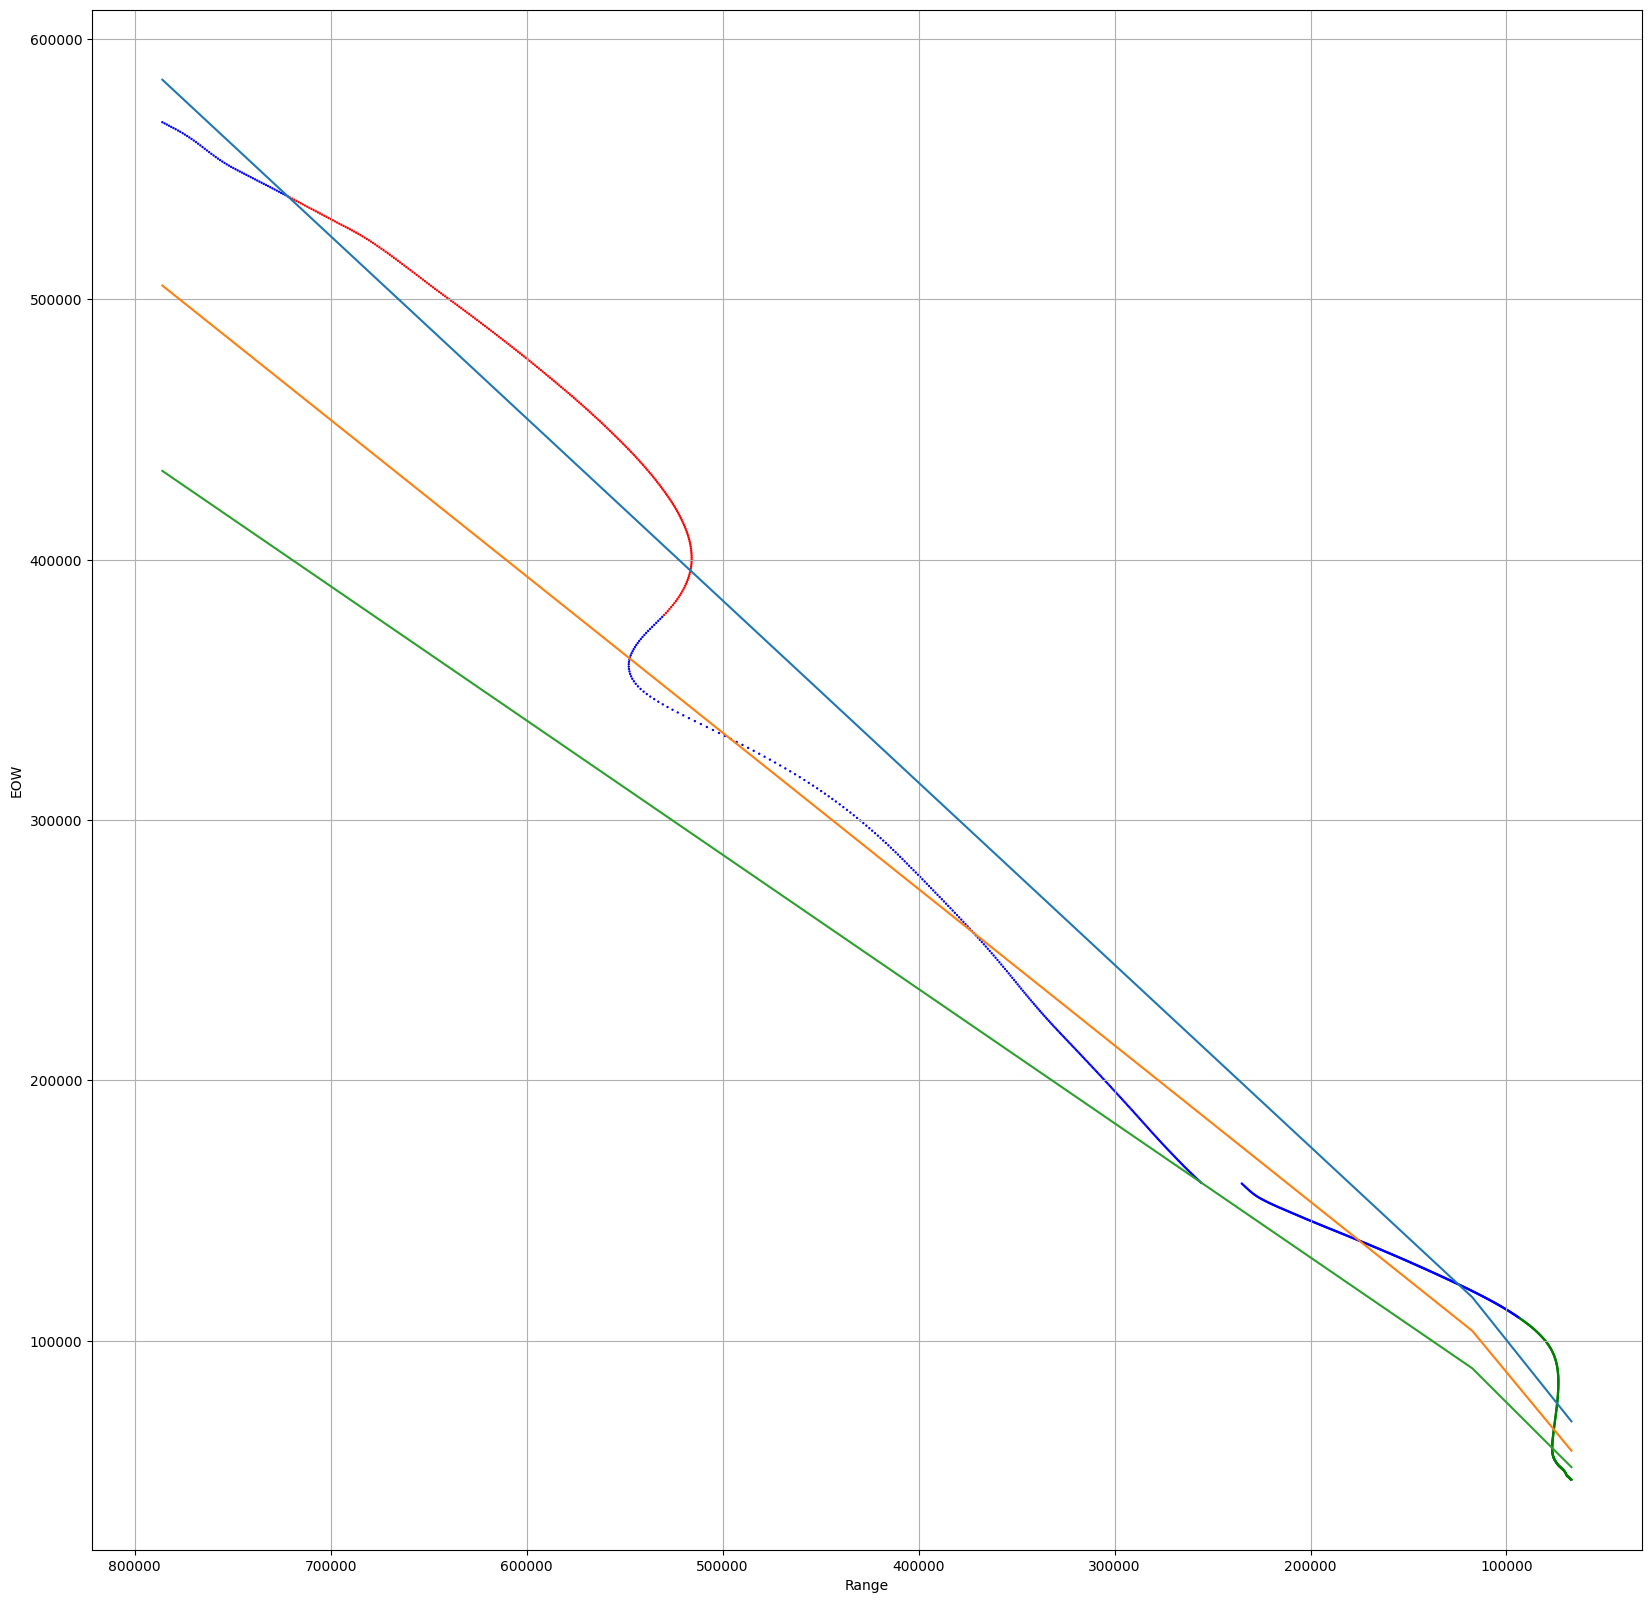

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))
    
plt_ = ax
plt_.scatter(data_taem['rpred'], data_taem['eow'], s=0.5, c=data_taem['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)
plt_.plot(data_taem['rpred'], data_taem['es'])
plt_.plot(data_taem['rpred'], data_taem['en'])
plt_.plot(data_taem['rpred'], data_taem['emep'])


plt_.set_xlabel('Range')
plt_.set_ylabel('EOW')
plt_.grid()

plt_.invert_xaxis()

Text(0.5, 0, 'Range')

Text(0, 0.5, 'EOW')

(0.0, 150000.0)

(0.0, 100000.0)

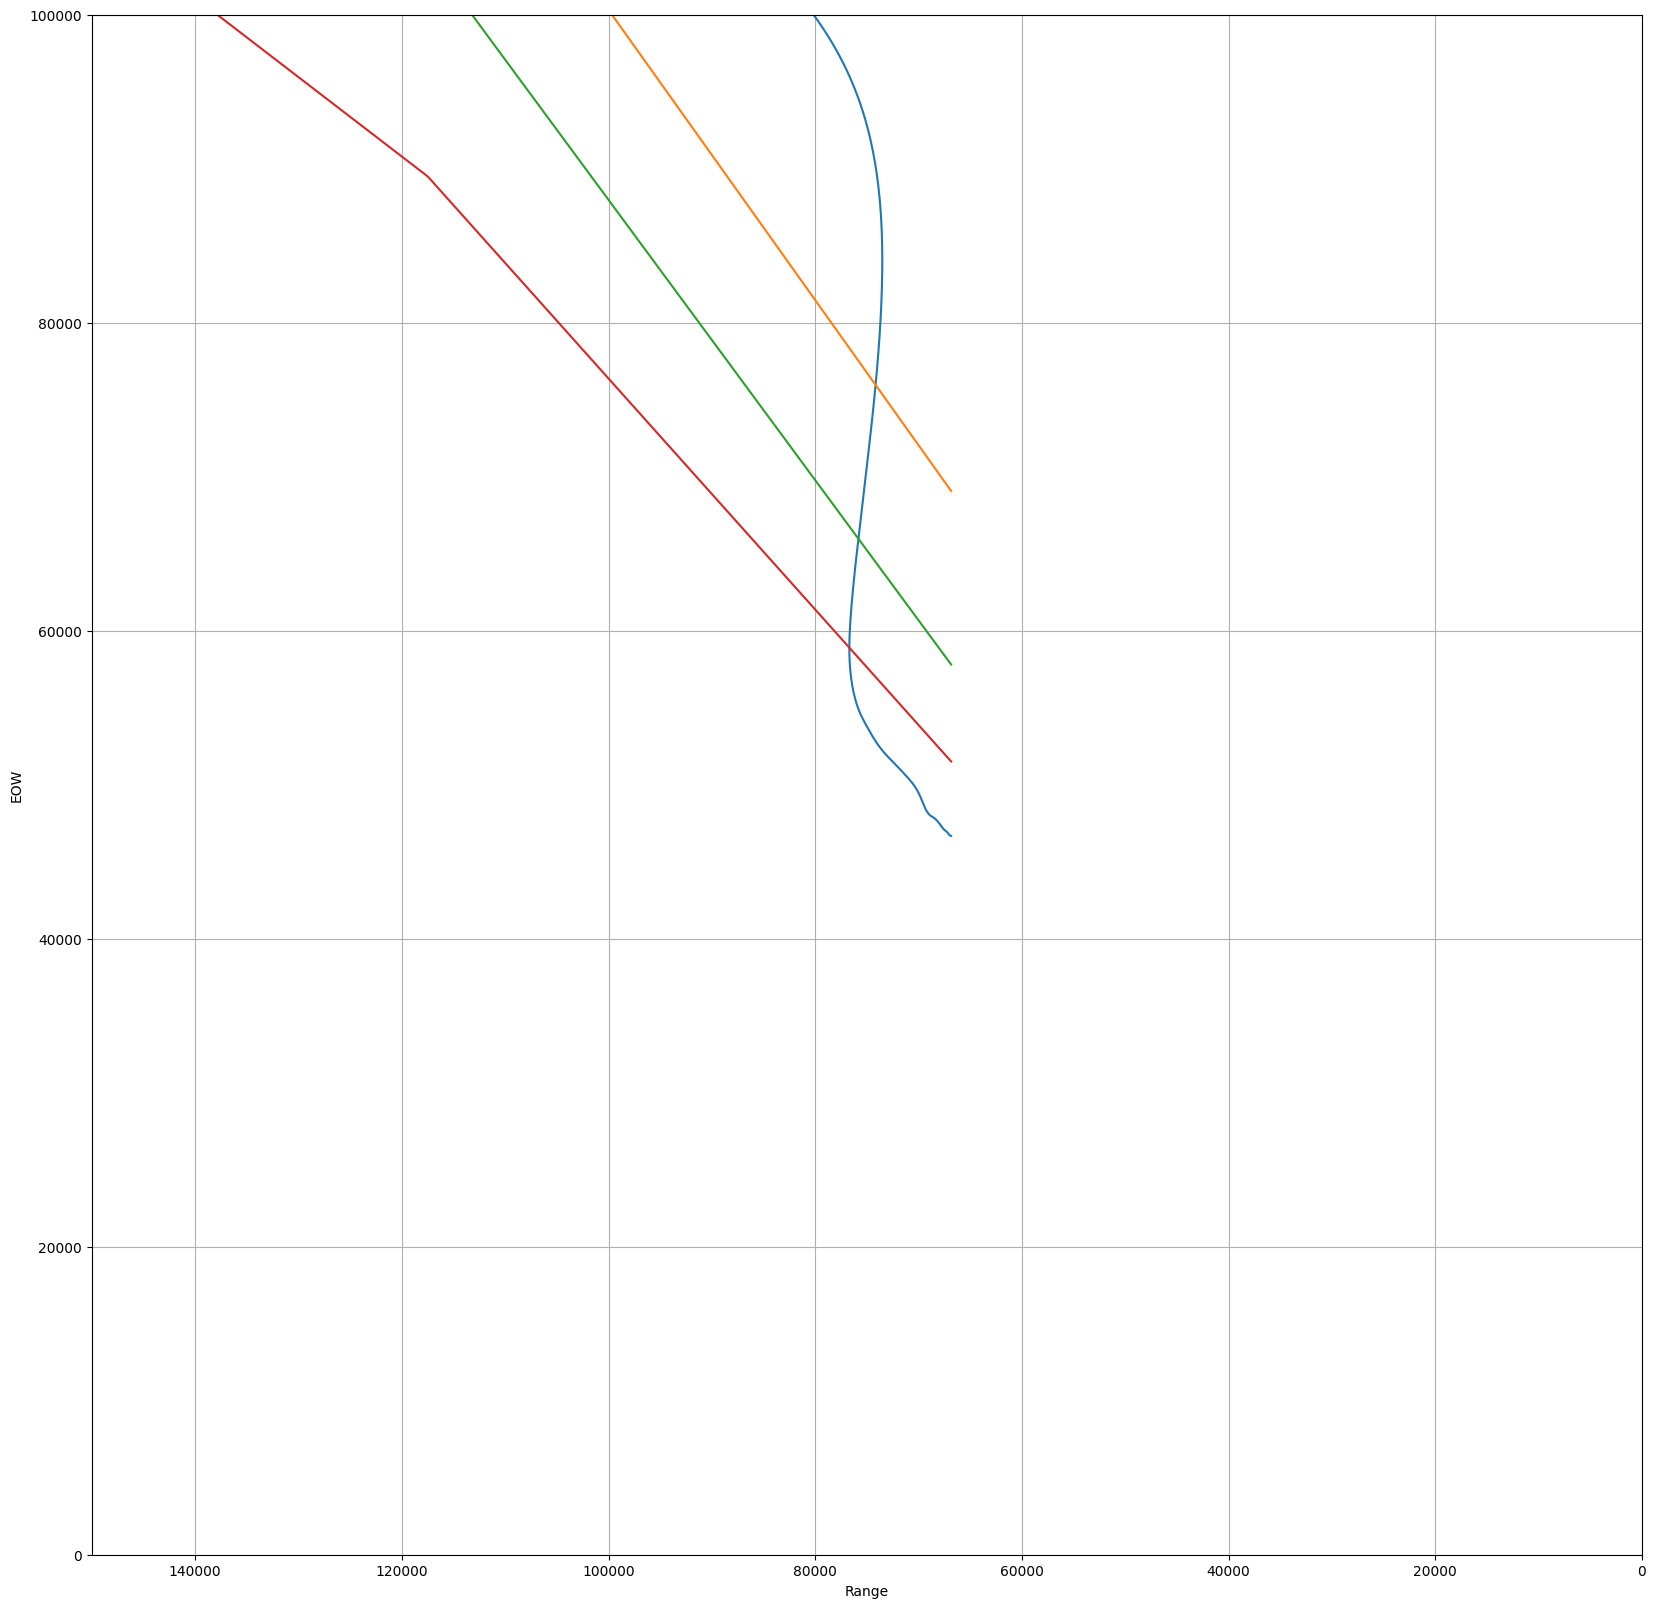

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))
    
plt_ = ax
plt_.plot(data_taem['rpred'], data_taem['eow'])
plt_.plot(data_taem['rpred'], data_taem['es'])
plt_.plot(data_taem['rpred'], data_taem['en'])
plt_.plot(data_taem['rpred'], data_taem['emep'])


plt_.set_xlabel('Range')
plt_.set_ylabel('EOW')
plt_.grid()

plt_.set_xlim([0, 150000])
plt_.set_ylim([0, 100000])

plt_.invert_xaxis()

Text(0.5, 0, 'time')

Text(0, 0.5, 'rpred')

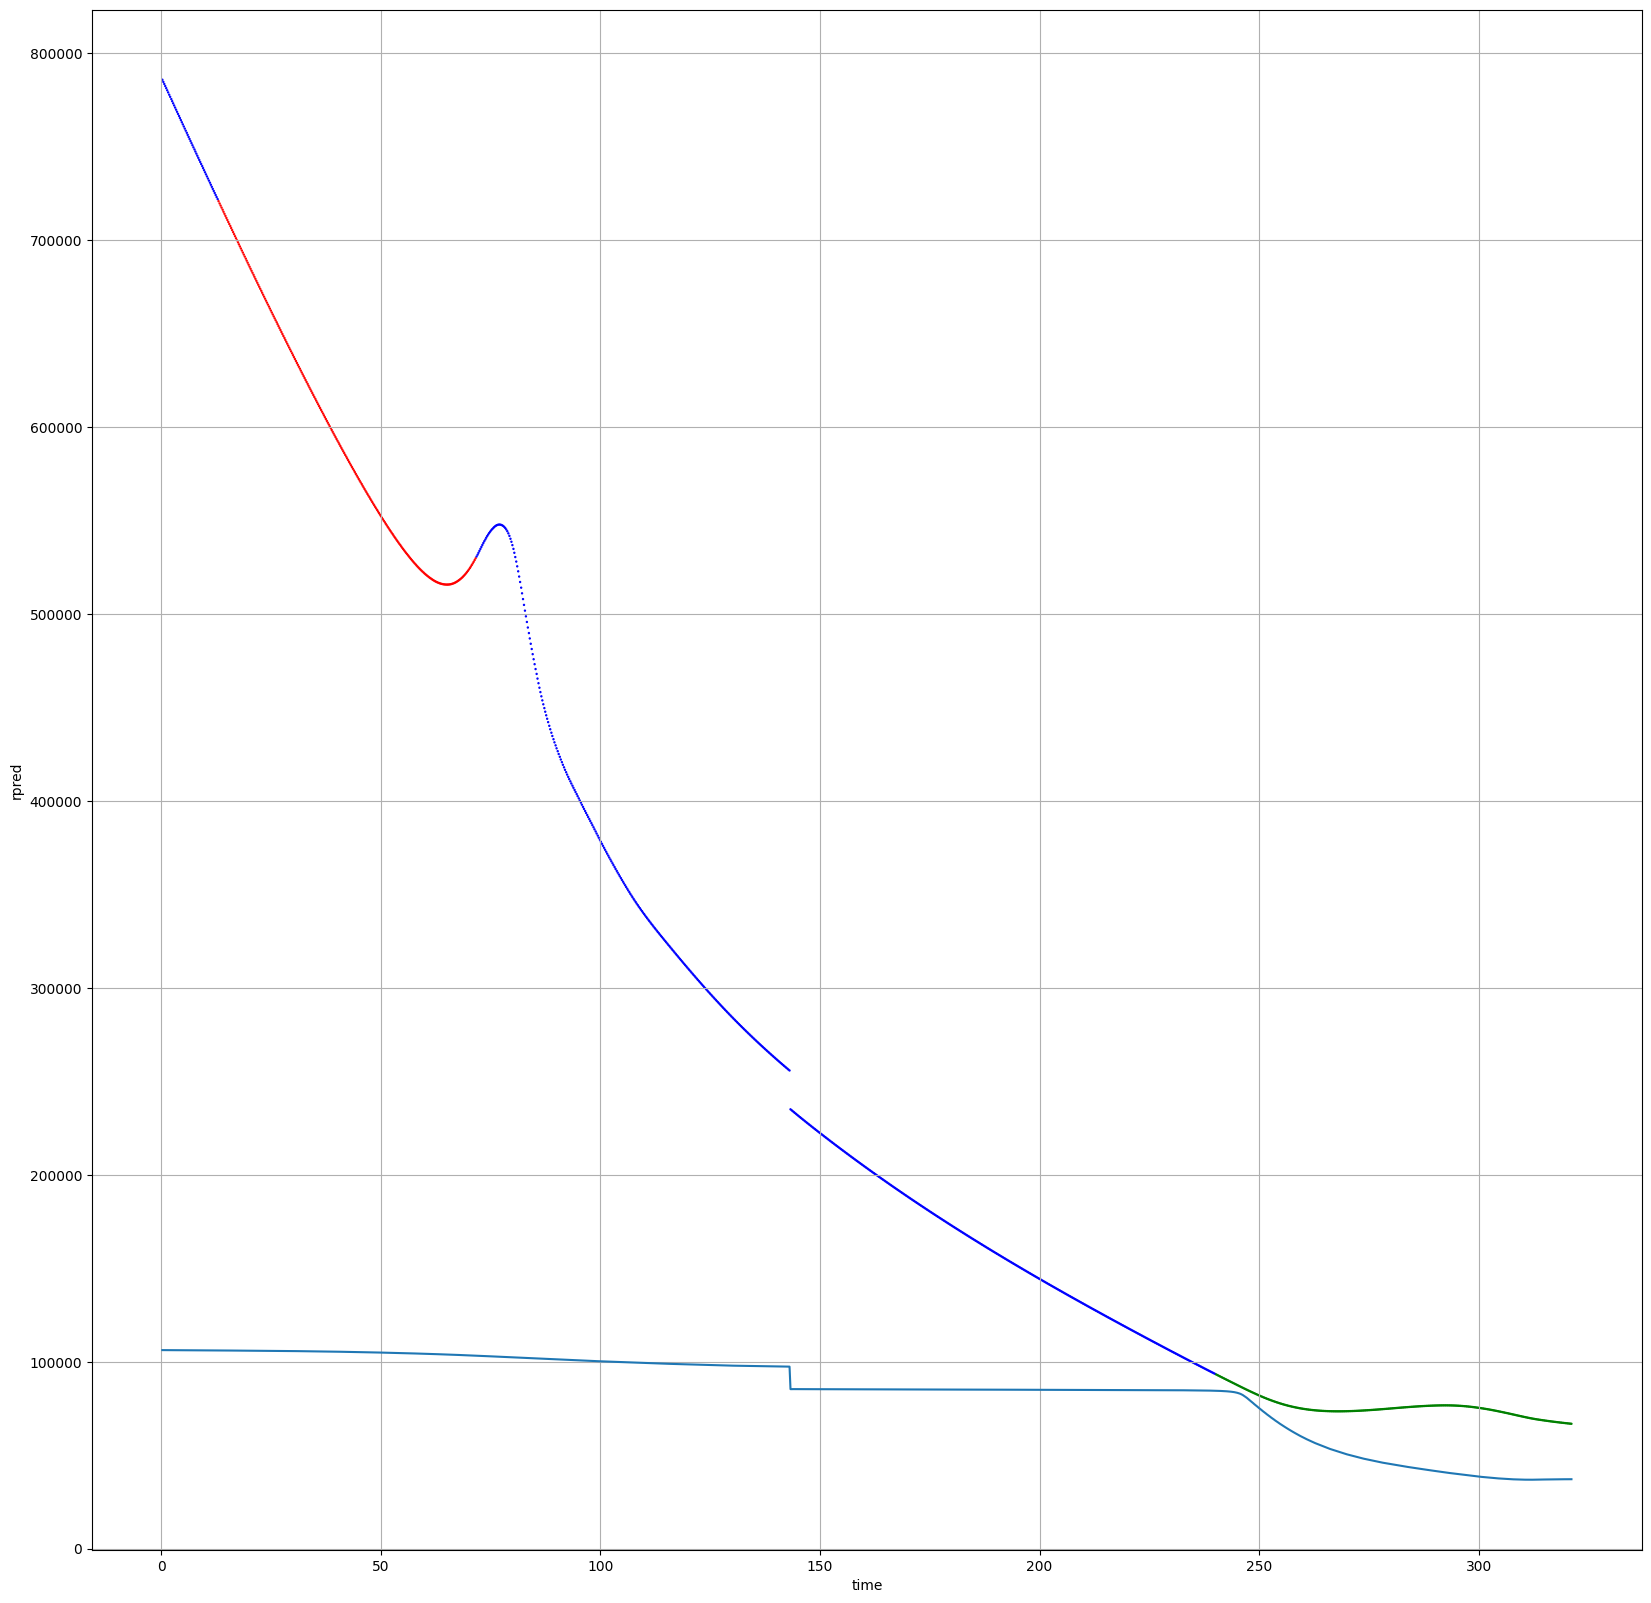

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))
    
plt_ = ax
plt_.scatter(data_taem['time'], data_taem['rpred'], s=0.5, c=data_taem['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)
plt_.plot(data_taem['time'], data_taem['rpred2'])


plt_.set_xlabel('time')
plt_.set_ylabel('rpred')
plt_.grid()




Text(0.5, 0, 'time')

Text(0, 0.5, 'rpred')

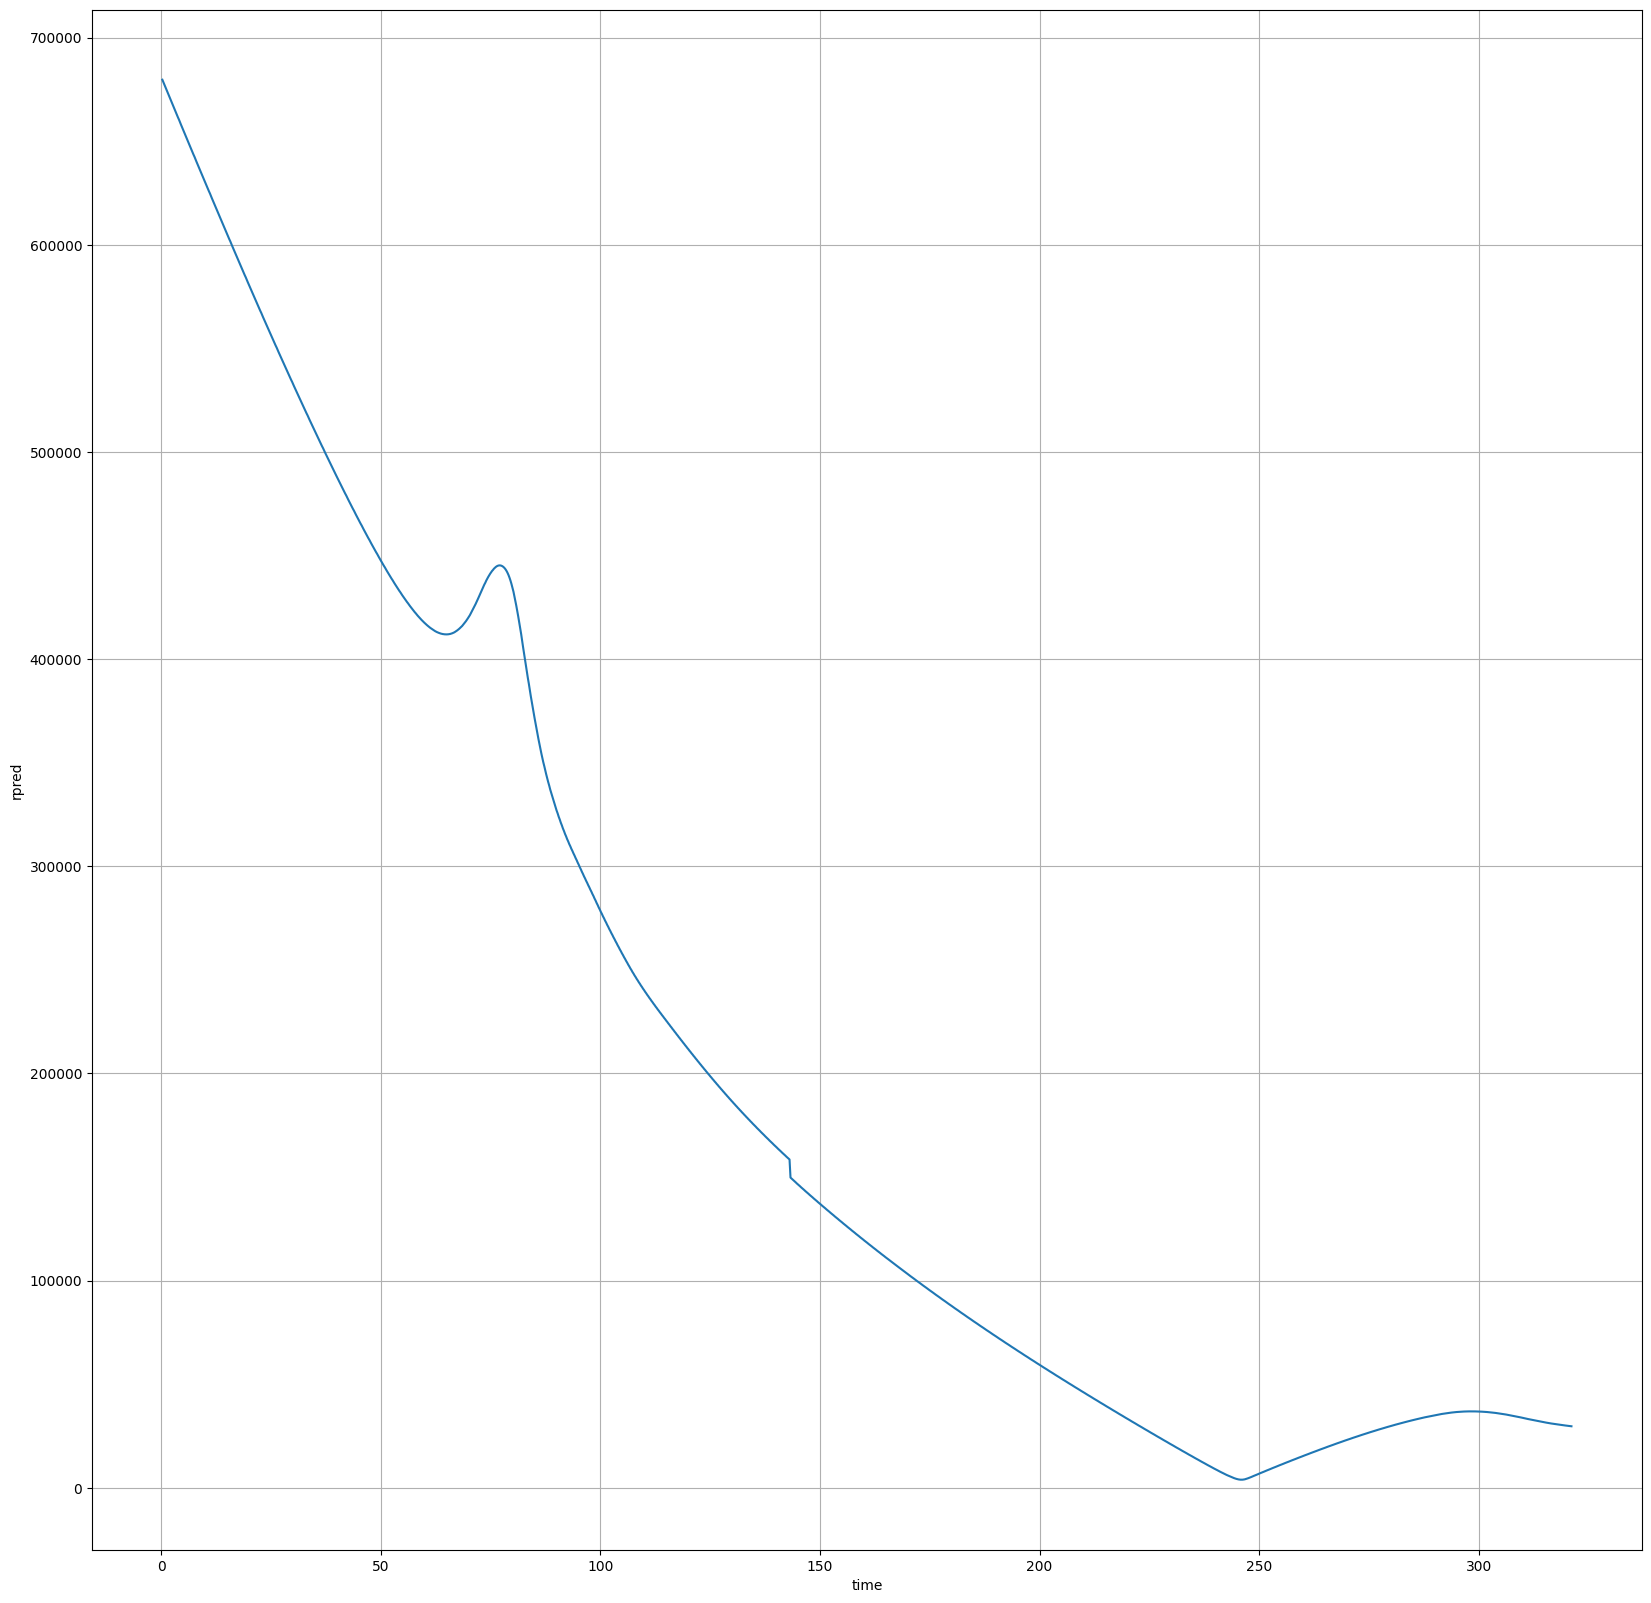

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))
    
plt_ = ax
plt_.plot(data_taem['time'], data_taem['rtan'])


plt_.set_xlabel('time')
plt_.set_ylabel('rpred')
plt_.grid()




Text(0.5, 0, 'time')

Text(0, 0.5, 'psc')

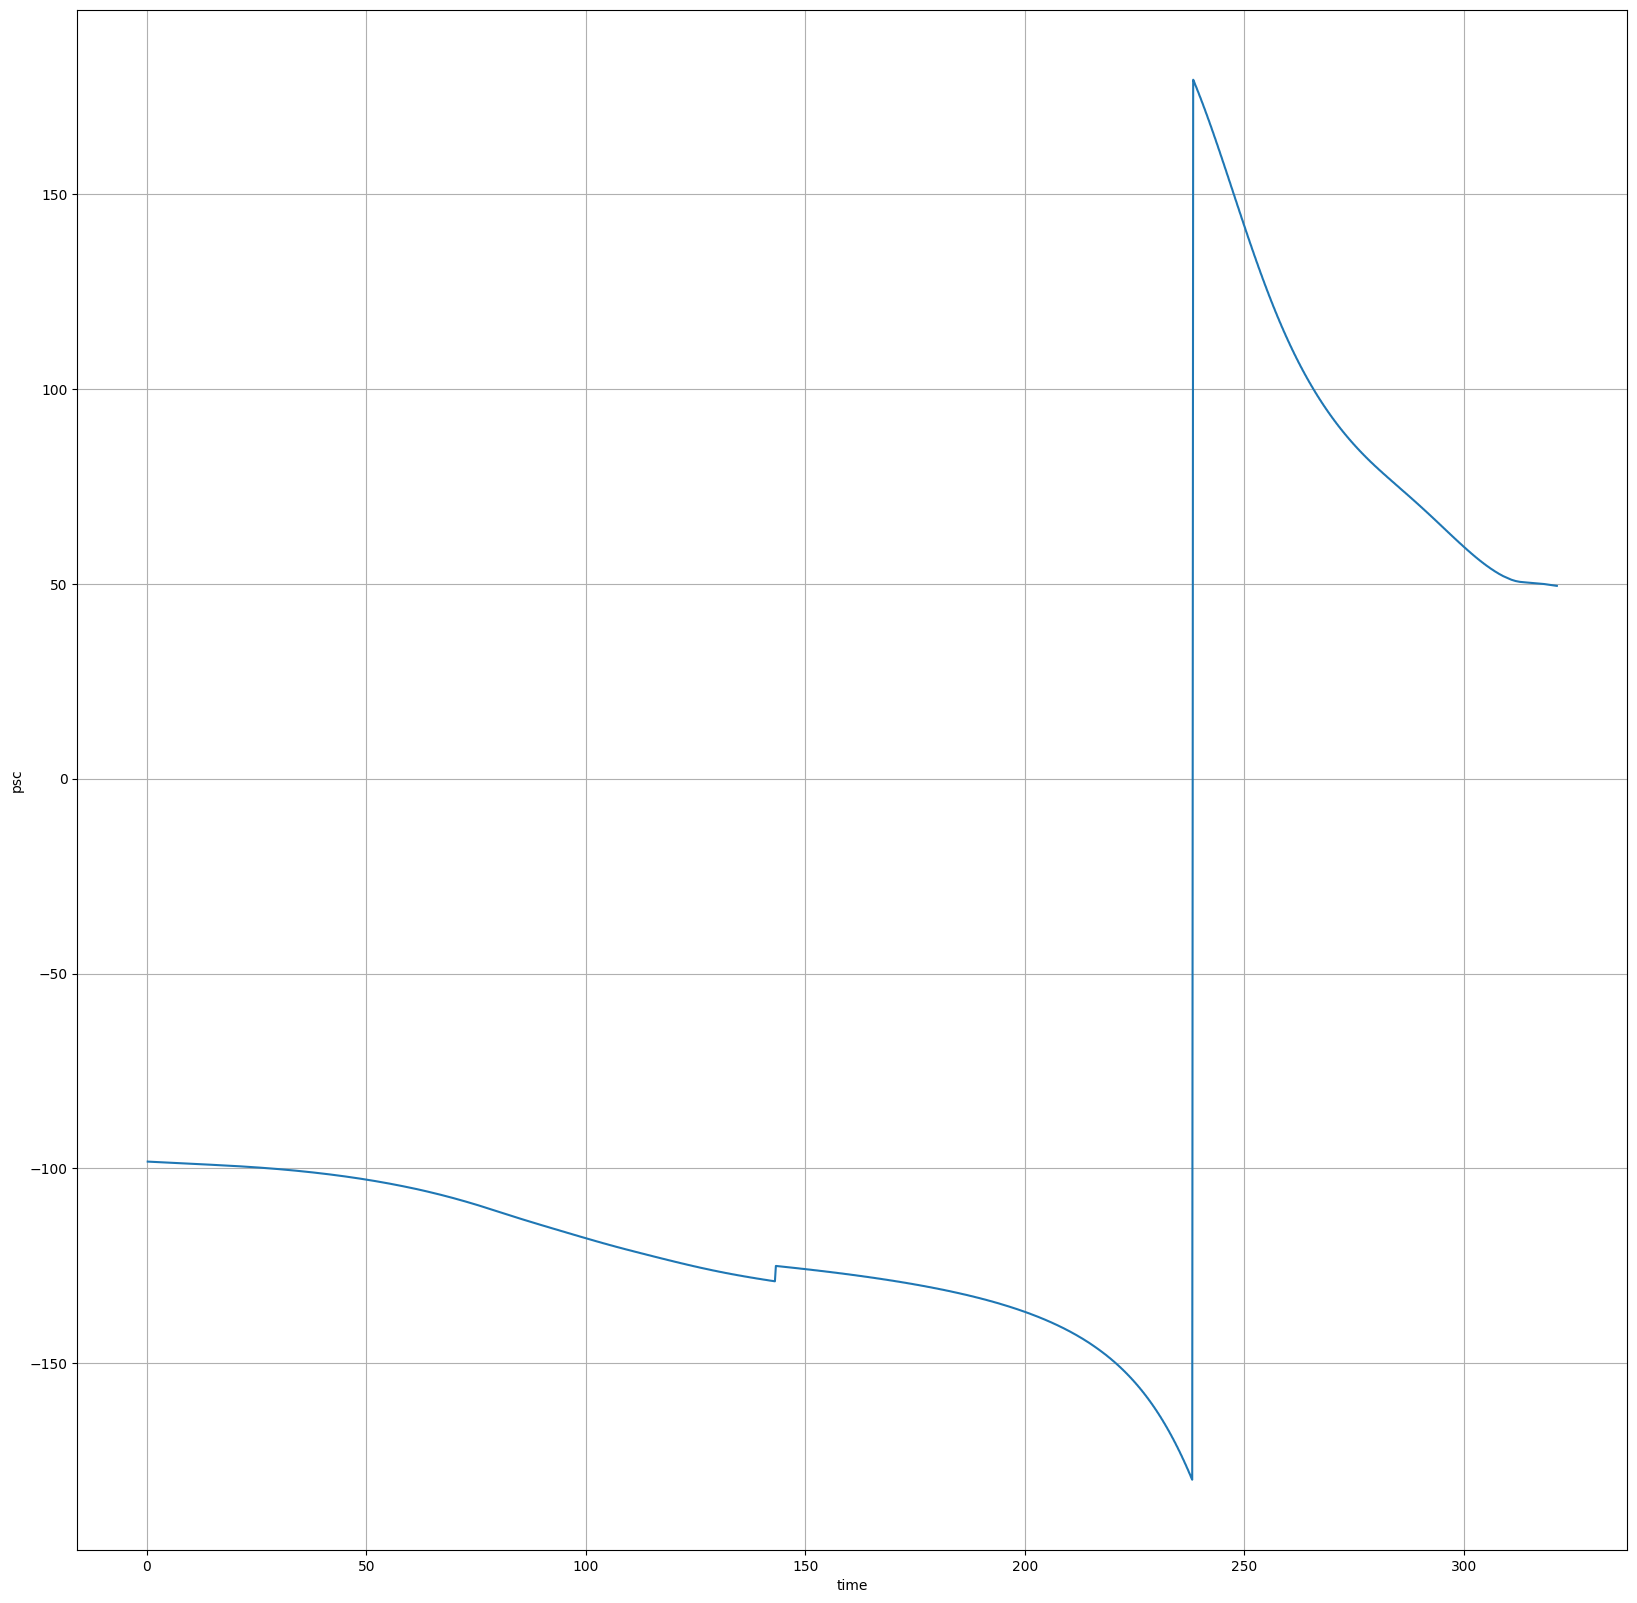

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))
    
plt_ = ax
plt_.plot(data_taem['time'], data_taem['psc'])


plt_.set_xlabel('time')
plt_.set_ylabel('psc')
plt_.grid()




Text(0.5, 0, 'time')

Text(0, 0.5, 'pst')

(320.0, 400.0)

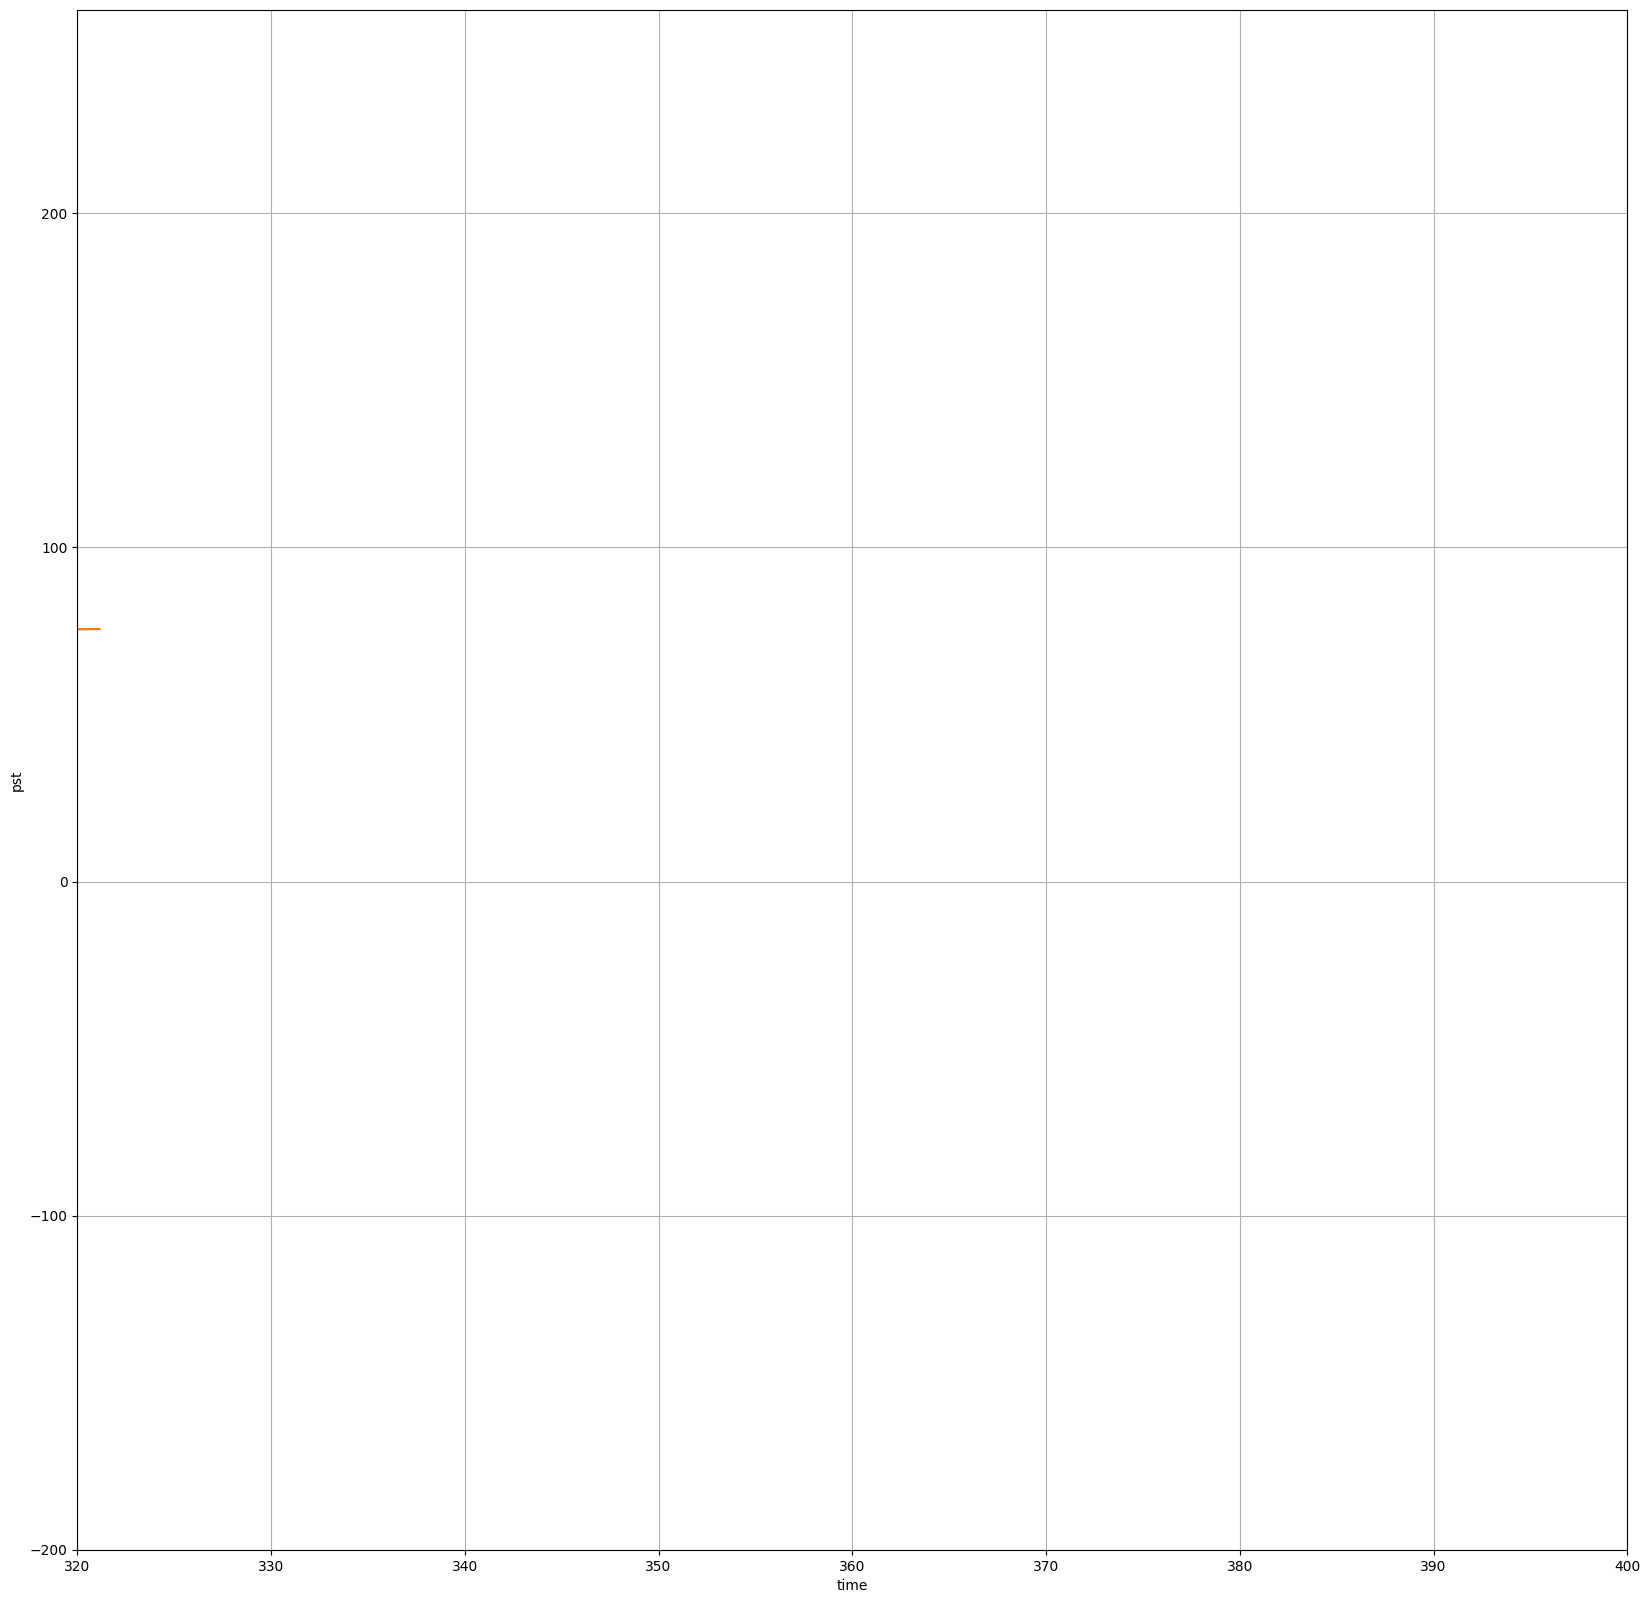

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))
    
plt_ = ax
plt_.plot(data_taem['time'], data_taem['pst'])
plt_.plot(data_taem['time'], data_taem['psc'] - data_taem['ysgn'] * np.arctan2(data_taem['rturn'], data_taem['rtan']) * 180 / np.pi)

 


plt_.set_xlabel('time')
plt_.set_ylabel('pst')
plt_.grid()

plt_.set_xlim([320, 400])

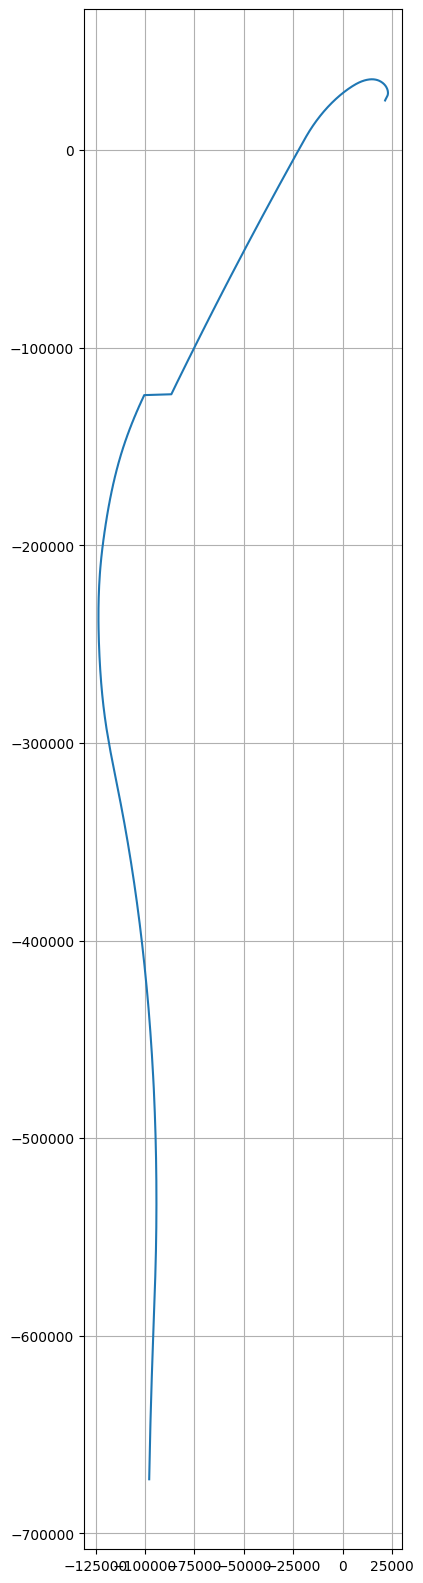

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))

plt_ = ax
plt_.plot(data_taem['xcir'], data_taem['ycir'])


plt_.set_aspect('equal')

plt_.grid()